# Predicting Liverpool FC's-  Bayesian and Machine Learning

By Harry Agyemang

Student Number: 200112345

Importing each libaray 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [152]:
df=pd.read_csv("combine.csv",encoding='latin1') #Dataset containing 2000-2021
df

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HHW,AHW,HC,AC,HF,AF,HO,AO
0,E0,19/08/2000,Charlton,Man City,4,0,H,2,0,H,...,14,4,2,1,6,6,13,12,8,6
1,E0,19/08/2000,Chelsea,West Ham,4,2,H,1,0,H,...,10,5,1,0,7,7,19,14,2,3
2,E0,19/08/2000,Coventry,Middlesbrough,1,3,A,1,1,D,...,3,9,0,1,8,4,15,21,1,3
3,E0,19/08/2000,Derby,Southampton,2,2,D,1,2,A,...,4,6,0,0,5,8,11,13,0,2
4,E0,19/08/2000,Leeds,Everton,2,0,H,2,0,H,...,8,6,0,0,6,4,21,20,6,1
5,E0,19/08/2000,Leicester,Aston Villa,0,0,D,0,0,D,...,4,3,0,0,5,4,12,12,1,4
6,E0,19/08/2000,Liverpool,Bradford,1,0,H,0,0,D,...,10,2,0,0,6,1,8,8,5,0
7,E0,19/08/2000,Sunderland,Arsenal,1,0,H,0,0,D,...,2,7,0,0,2,9,10,21,2,3
8,E0,19/08/2000,Tottenham,Ipswich,3,1,H,2,1,H,...,6,5,2,1,3,4,14,13,2,3
9,E0,20/08/2000,Man United,Newcastle,2,0,H,1,0,H,...,9,6,2,0,7,1,7,13,5,9


#  Data Inspection

In [4]:
df.info() # retrive details on the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 23 columns):
Div         7600 non-null object
Date        7600 non-null object
HomeTeam    7600 non-null object
AwayTeam    7600 non-null object
FTHG        7600 non-null int64
FTAG        7600 non-null int64
FTR         7600 non-null object
HTHG        7600 non-null int64
HTAG        7600 non-null int64
HTR         7600 non-null object
Referee     7600 non-null object
HS          7600 non-null int64
AS          7600 non-null int64
HST         7600 non-null int64
AST         7600 non-null int64
HHW         7600 non-null int64
AHW         7600 non-null int64
HC          7600 non-null int64
AC          7600 non-null int64
HF          7600 non-null int64
AF          7600 non-null int64
HO          7600 non-null int64
AO          7600 non-null int64
dtypes: int64(16), object(7)
memory usage: 1.3+ MB


In [5]:
df.dtypes # understand each of the data types.

Div         object
Date        object
HomeTeam    object
AwayTeam    object
FTHG         int64
FTAG         int64
FTR         object
HTHG         int64
HTAG         int64
HTR         object
Referee     object
HS           int64
AS           int64
HST          int64
AST          int64
HHW          int64
AHW          int64
HC           int64
AC           int64
HF           int64
AF           int64
HO           int64
AO           int64
dtype: object

In [6]:
#dataset descriptions 
print(df.describe()) #only the digital label as its a init64 and the others are objects

              FTHG         FTAG         HTHG         HTAG           HS  \
count  7600.000000  7600.000000  7600.000000  7600.000000  7600.000000   
mean      1.521316     1.149342     0.681316     0.503158    13.514474   
std       1.296464     1.140914     0.831679     0.719872     5.281227   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.000000     0.000000     0.000000    10.000000   
50%       1.000000     1.000000     0.000000     0.000000    13.000000   
75%       2.000000     2.000000     1.000000     1.000000    17.000000   
max       9.000000     9.000000     5.000000     5.000000    43.000000   

                AS          HST          AST          HHW          AHW  \
count  7600.000000  7600.000000  7600.000000  7600.000000  7600.000000   
mean     10.628684     6.123816     4.762895    10.115132    10.508289   
std       4.570199     3.338366     2.787153     4.780265     4.981628   
min       0.000000     0.000000     0

In [7]:
df.groupby('HomeTeam').size() # extract the digital labels by size

HomeTeam
Arsenal             380
Aston Villa         323
Birmingham          114
Blackburn           190
Blackpool            19
Bolton              190
Bournemouth          95
Bradford             19
Brighton             76
Burnley             133
Cardiff              38
Charlton            114
Chelsea             380
Coventry             19
Crystal Palace      171
Derby                57
Everton             380
Fulham              266
Huddersfield         38
Hull                 95
Ipswich              38
Leeds                76
Leicester           171
Liverpool           380
Man City            361
Man United          380
Middlesbrough       171
Newcastle           342
Norwich             114
Portsmouth          114
QPR                  57
Reading              57
Sheffield United     57
Southampton         247
Stoke               190
Sunderland          266
Swansea             133
Tottenham           380
Watford             114
West Brom           247
West Ham            342
Wigan  

In [8]:
df.groupby('AwayTeam').size() # extract the digital labels by size

AwayTeam
Arsenal             380
Aston Villa         323
Birmingham          114
Blackburn           190
Blackpool            19
Bolton              190
Bournemouth          95
Bradford             19
Brighton             76
Burnley             133
Cardiff              38
Charlton            114
Chelsea             380
Coventry             19
Crystal Palace      171
Derby                57
Everton             380
Fulham              266
Huddersfield         38
Hull                 95
Ipswich              38
Leeds                76
Leicester           171
Liverpool           380
Man City            361
Man United          380
Middlesbrough       171
Newcastle           342
Norwich             114
Portsmouth          114
QPR                  57
Reading              57
Sheffield United     57
Southampton         247
Stoke               190
Sunderland          266
Swansea             133
Tottenham           380
Watford             114
West Brom           247
West Ham            342
Wigan  

In [9]:
df.iloc[700] # Gives you the row at position seven hundred with full details.

Div                    E0
Date           01/04/2002
HomeTeam         Charlton
AwayTeam          Arsenal
FTHG                    0
FTAG                    3
FTR                     A
HTHG                    0
HTAG                    3
HTR                     A
Referee     D'Urso, A. P.
HS                      5
AS                     12
HST                     5
AST                     8
HHW                     0
AHW                     0
HC                      9
AC                      2
HF                      7
AF                     15
HO                      3
AO                      0
Name: 700, dtype: object

In [10]:
df.shape # returns a matrix of i rows and j columns.

(7600, 23)

In [11]:
df.FTR[df.HomeTeam=='Liverpool'].unique()

array(['H', 'D', 'A'], dtype=object)

In [12]:
df.FTR[df.HomeTeam=='Liverpool'].value_counts() #Home wins, Draws and Away wins

H    242
D     95
A     43
Name: FTR, dtype: int64

In [13]:
df.FTR[df.AwayTeam=='Liverpool'].value_counts() #Away wins, HomeTeam wins, Draws

A    178
H    118
D     84
Name: FTR, dtype: int64

In [14]:
df.AwayTeam[(df.FTR=='D') & (df.HomeTeam=='Liverpool')] #Teams which frew with Liverpool GC at Home

63         Sunderland
230     Middlesbrough
295             Derby
366           Chelsea
454             Leeds
535            Fulham
581            Bolton
600       Southampton
643           Everton
796         Newcastle
803        Birmingham
897        Sunderland
947           Everton
952         Blackburn
979       Aston Villa
1003          Arsenal
1023    Middlesbrough
1309       Portsmouth
1428        Blackburn
1463        Tottenham
1490    Middlesbrough
1572       Man United
1751       Birmingham
1789         Charlton
1971        Blackburn
2042       Portsmouth
2151          Everton
2273         Charlton
2305          Chelsea
2339       Birmingham
            ...      
5020             Hull
5081       Sunderland
5107          Arsenal
5132        Leicester
5377          Norwich
5417      Southampton
5477        West Brom
5524          Arsenal
5561       Sunderland
5626        Tottenham
5661        Newcastle
5687          Chelsea
5779       Man United
5847         West Ham
5923      

In [29]:
df.Referee[df.HomeTeam=='Liverpool'].unique()

array(['Paul Durkin', 'Neale Barry', 'Graham Barber', 'Mike Riley',
       "Andy D'Urso", 'Rob Styles', 'Alan Wiley', 'Dermot Gallagher',
       'Steve Dunn', 'Steve Bennett', 'Graham Poll', 'Barry Knight',
       'Mark Halsey', 'J. T. Winter', "A. P. D'Urso", 'D. J. Gallagher',
       'A. G. Wiley', 'G. Poll', 'S. G. Bennett', 'Durkin, P. A.',
       'Wilkes, C. R.', 'Barry, N. S.', 'Knight, B.', 'Elleray, D. R.',
       'Winter, J. T.', 'Halsey, M. R.', 'Gallagher, D. J.',
       'Riley, M. A.', 'Wiley, A. G.', 'Dunn, S. W.', 'J Winter',
       'G Poll', 'N Barry', 'D Elleray', 'G Barber', 'M Riley',
       'E Wolstenholme', "A D'Urso", 'A Wiley', 'P Durkin', 'M Halsey',
       'S Bennett', 'S Dunn', 'U Rennie', 'P Dowd', 'M Clattenburg',
       'R Styles', 'B Knight', 'P Walton', 'D Gallagher', 'M Atkinson',
       'H Webb', 'L Mason', 'S Tanner', 'A Marriner', 'S Attwell',
       'L Probert', 'M Jones', 'K Friend', 'A Taylor', 'M Oliver',
       'N Swarbrick', 'R East', 'J Moss', '

In [31]:
df.Referee.value_counts() #Mike Dean is the most experianced referee in the EPL and has been invovled in 482 games

M Dean                 482
M Atkinson             433
A Marriner             360
M Oliver               294
M Clattenburg          293
H Webb                 288
L Mason                287
A Taylor               286
P Dowd                 284
K Friend               254
J Moss                 249
C Foy                  248
M Halsey               205
M Jones                202
A Wiley                188
S Bennett              185
L Probert              182
C Pawson               180
P Walton               164
R Styles               156
M Riley                147
S Attwell              138
N Swarbrick            132
G Poll                 115
P Tierney              101
R East                  91
R Madley                91
C Kavanagh              88
U Rennie                82
G Scott                 81
                      ... 
P.A. Durkin              1
Ian Harris               1
P. A. Durkin             1
A. G. Wiley              1
C. J. Foy                1
 U Rennie                1
F

# Dataset visualisation

In this selection i will be using Data visualization to give me a clear idea of what my data means with visuals through the use of mayplot and seaborn libaries. This makes the data more understandable for us as we can comprehend and therefore be able to easierly idenfy trends, patterns and outliers within this dataset

C:\Users\Burberry Harry\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


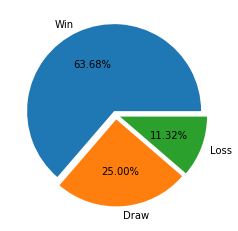

In [6]:
x=[df.FTR[df.HomeTeam=='Liverpool'].value_counts()]
labels=['Win', 'Draw', 'Loss']
explode=[0.05,0.05,0.05]
plt.pie(x=x, labels=labels, autopct='%1.2f%%', explode=explode)
plt.show()

C:\Users\Burberry Harry\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


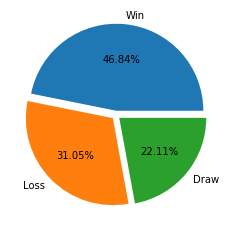

In [7]:
x=[df.FTR[df.AwayTeam=='Liverpool'].value_counts()]
labels=['Win', 'Loss', 'Draw']
explode=[0.05,0.05,0.05]
plt.pie(x=x, labels=labels, autopct='%1.2f%%', explode=explode)
plt.show()

In [9]:
from statsmodels.stats import proportion
conf=proportion.proportion_confint((df['FTR']=='H').sum(), df['FTR'].count(), alpha=0.05, method='normal')
print('The chance of home team to win with %95 confidence interval falls in :{}'.format(conf)) #https://github.com/Stokeslet/Predicting-Football-Results-with-Machine-Learning/blob/master/Soccer.ipynb

The chance of home team to win with %95 confidence interval falls in :(0.4501083196642593, 0.4725232592831092)


In [ ]:
# most_probable home score
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
plt.hist(df.FTHG,bins=30,edgecolor='white')
plt.xticks(range(18))

In [ ]:
sns.catplot('FTHG', data=df, kind="count", hue="FTR") 

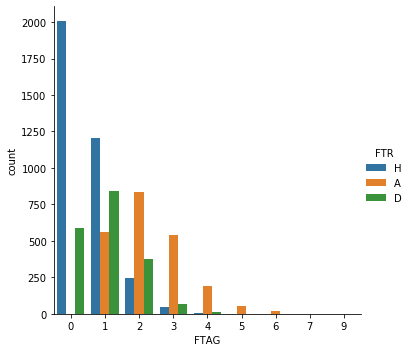

In [19]:
sns.catplot('FTAG', data=df, kind="count", hue="FTR") 

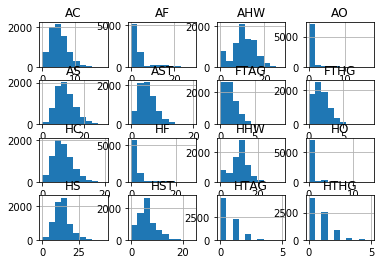

In [20]:
df.hist()
plt.show()

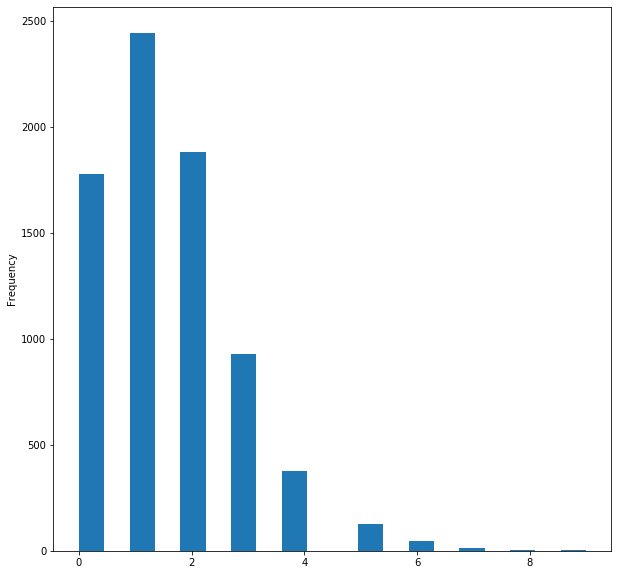

In [21]:
df.FTHG.plot(kind = 'hist',bins = 20,figsize = (10,10))
plt.show()

In [22]:
%config InlineBackend.figure_formats = set(['retina'])

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

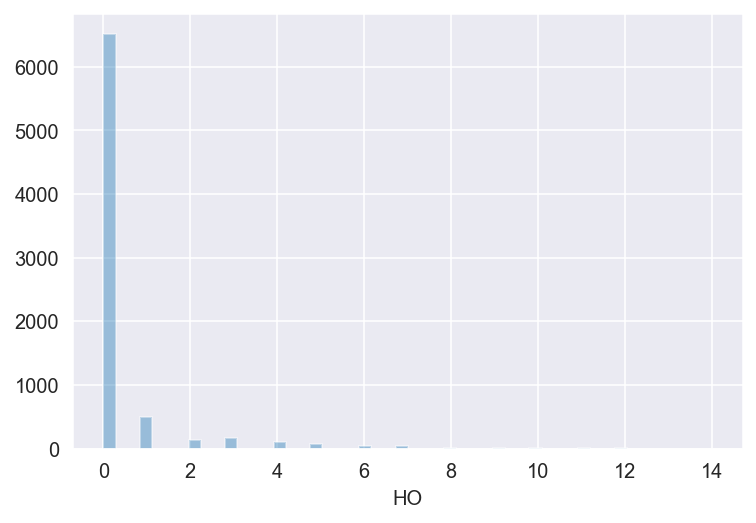

In [23]:
sns.distplot(df['HO'], bins=None, kde=False)

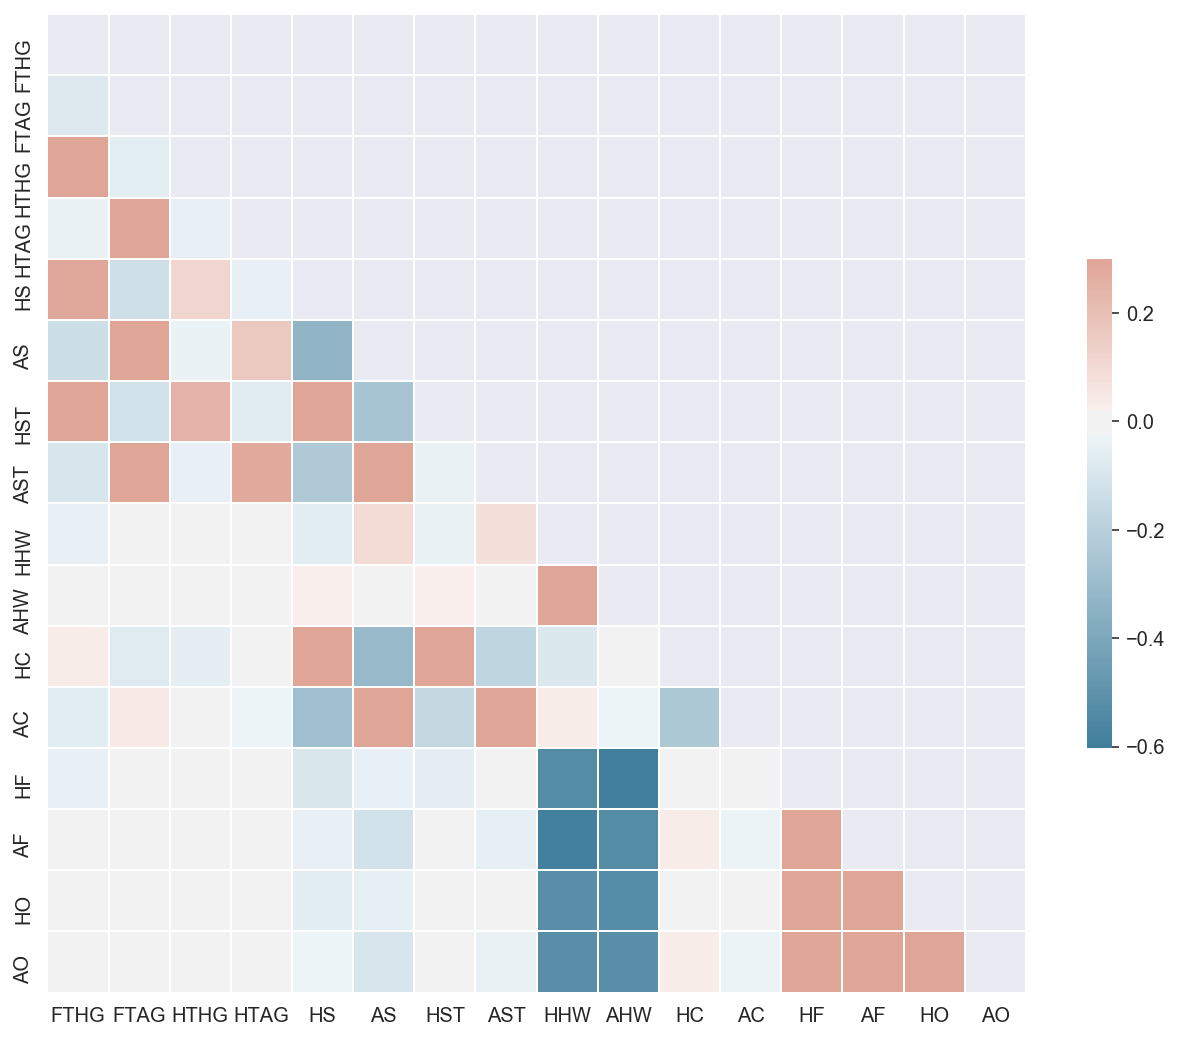

In [24]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

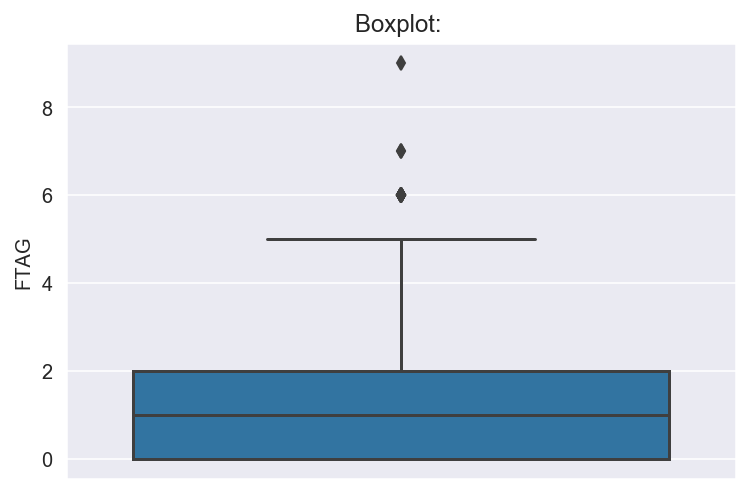

In [28]:
sns.boxplot(df['FTAG'], orient='v')
plt.title('Boxplot: ')
plt.show()

In [32]:
df["total_goals"] = df['FTHG'] + df['FTAG']
df.dropna(inplace=True)
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HHW,AHW,HC,AC,HF,AF,HO,AO,total_goals
0,E0,19/08/2000,Charlton,Man City,4,0,H,2,0,H,...,4,2,1,6,6,13,12,8,6,4
1,E0,19/08/2000,Chelsea,West Ham,4,2,H,1,0,H,...,5,1,0,7,7,19,14,2,3,6
2,E0,19/08/2000,Coventry,Middlesbrough,1,3,A,1,1,D,...,9,0,1,8,4,15,21,1,3,4
3,E0,19/08/2000,Derby,Southampton,2,2,D,1,2,A,...,6,0,0,5,8,11,13,0,2,4
4,E0,19/08/2000,Leeds,Everton,2,0,H,2,0,H,...,6,0,0,6,4,21,20,6,1,2


Text(0.5, 0, 'Team name')

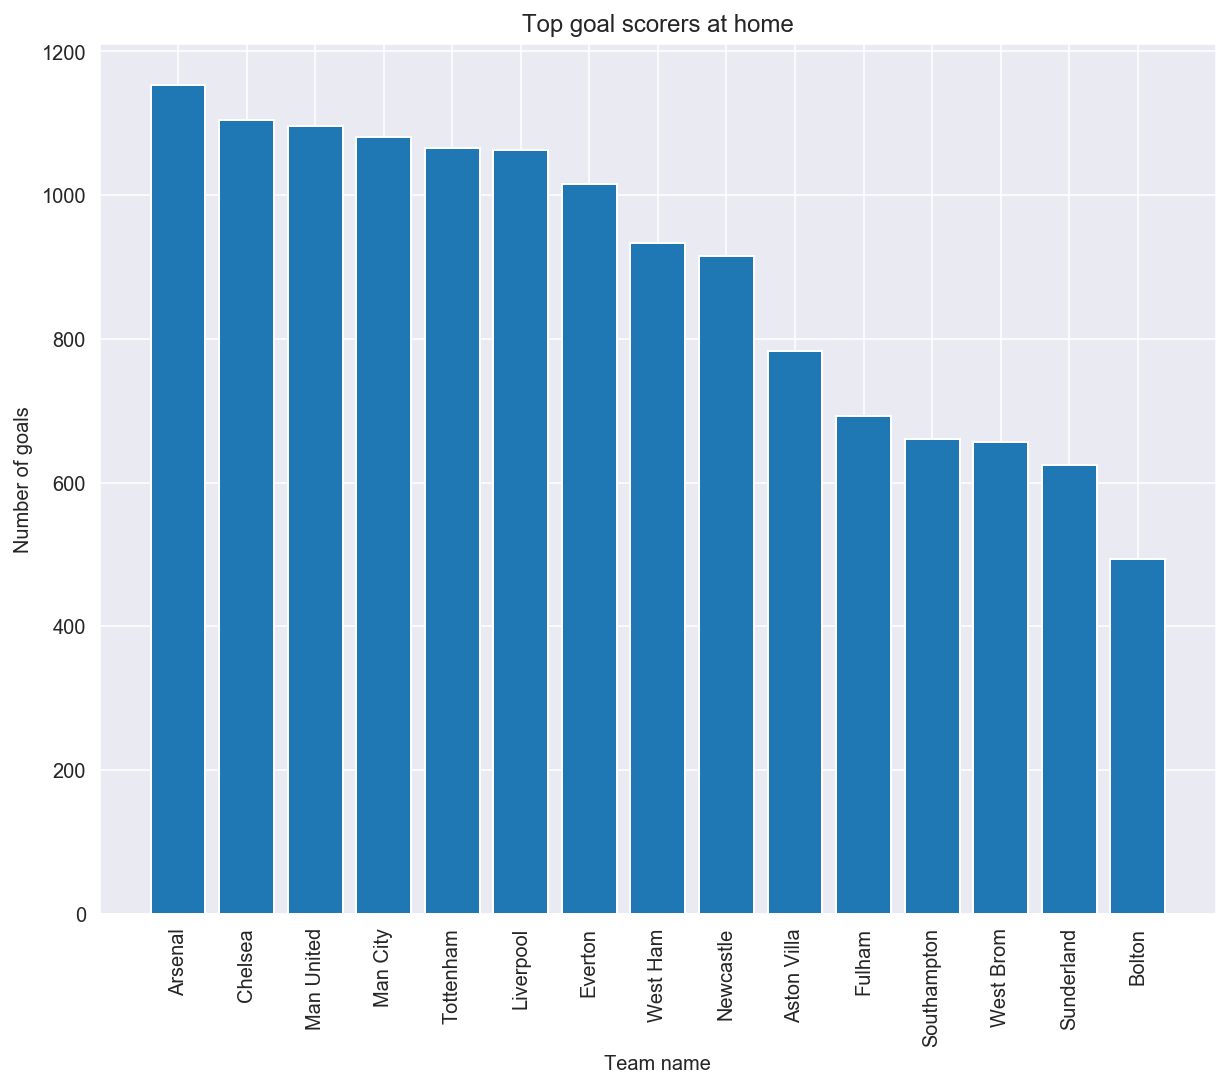

In [33]:
top_goal_scorers_home = df.groupby('HomeTeam').total_goals.sum().sort_values(ascending = False)
top_goal_scorers_home.head(15)
%matplotlib inline 
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1)
rects = ax.bar(range(15), top_goal_scorers_home.head(15).values,align = "center")
ax.set_xticks(range(15))
ax.set_xticklabels(top_goal_scorers_home.head(15).index,rotation = "vertical")
ax.set_title("Top goal scorers at home")
ax.set_ylabel("Number of goals")
ax.set_xlabel("Team name")

# Preprocessing

In this section i preformed pre processing on our data. Preprocessing is the process of doing a pre-analysis of data, in order to transform them into a standard and normalized format.

In [26]:
freq = df['FTR'].value_counts()/len(df)
display(freq)

print("\nCorrelation coefficients:")
display(df.corr())

H    0.461316
A    0.290132
D    0.248553
Name: FTR, dtype: float64


Correlation coefficients:


,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HHW,AHW,HC,AC,HF,AF,HO,AO
FTHG,1.000000,-0.077730,0.684761,-0.040258,0.286810,-0.135233,0.432133,-0.102540,-0.045062,-0.017031,0.032563,-0.065164,-0.043390,-0.017061,0.002305,-0.001249
FTAG,-0.077730,1.000000,-0.062172,0.679348,-0.126650,0.316824,-0.119598,0.442687,0.012627,-0.016229,-0.075086,0.042706,0.021095,-0.016886,0.005410,-0.013482
HTHG,0.684761,-0.062172,1.000000,-0.044038,0.118676,-0.035672,0.251200,-0.045432,-0.010465,-0.012067,-0.055176,0.017345,-0.023039,-0.008649,0.008189,-0.009096
HTAG,-0.040258,0.679348,-0.044038,1.000000,-0.046603,0.167994,-0.070062,0.276369,0.000258,0.002103,-0.017583,-0.026212,0.020414,-0.005811,0.006176,-0.003858
HS,0.286810,-0.126650,0.118676,-0.046603,1.000000,-0.327494,0.685647,-0.233509,-0.065920,0.026773,0.477024,-0.280449,-0.093957,-0.047967,-0.064064,-0.026256
AS,-0.135233,0.316824,-0.035672,0.167994,-0.327494,1.000000,-0.258212,0.691657,0.092088,-0.007668,-0.311647,0.468972,-0.048892,-0.113820,-0.050400,-0.102134
HST,0.432133,-0.119598,0.251200,-0.070062,0.685647,-0.258212,1.000000,-0.038595,-0.038488,0.026150,0.356565,-0.166883,-0.054382,-0.011927,-0.012955,0.003359
AST,-0.102540,0.442687,-0.045432,0.276369,-0.233509,0.691657,-0.038595,1.000000,0.076740,-0.002181,-0.175731,0.342046,-0.012952,-0.049638,-0.007967,-0.038819
HHW,-0.045062,0.012627,-0.010465,0.000258,-0.065920,0.092088,-0.038488,0.076740,1.000000,0.551044,-0.088950,0.031817,-0.535266,-0.590545,-0.519829,-0.519553
AHW,-0.017031,-0.016229,-0.012067,0.002103,0.026773,-0.007668,0.026150,-0.002181,0.551044,1.000000,-0.018230,-0.026985,-0.602459,-0.535298,-0.528377,-0.516890


In [25]:
df.isnull().sum() # sum of null in dataframe

Div         0
Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HHW         0
AHW         0
HC          0
AC          0
HF          0
AF          0
HO          0
AO          0
dtype: int64

Text(0.5, 0, 'Team name')

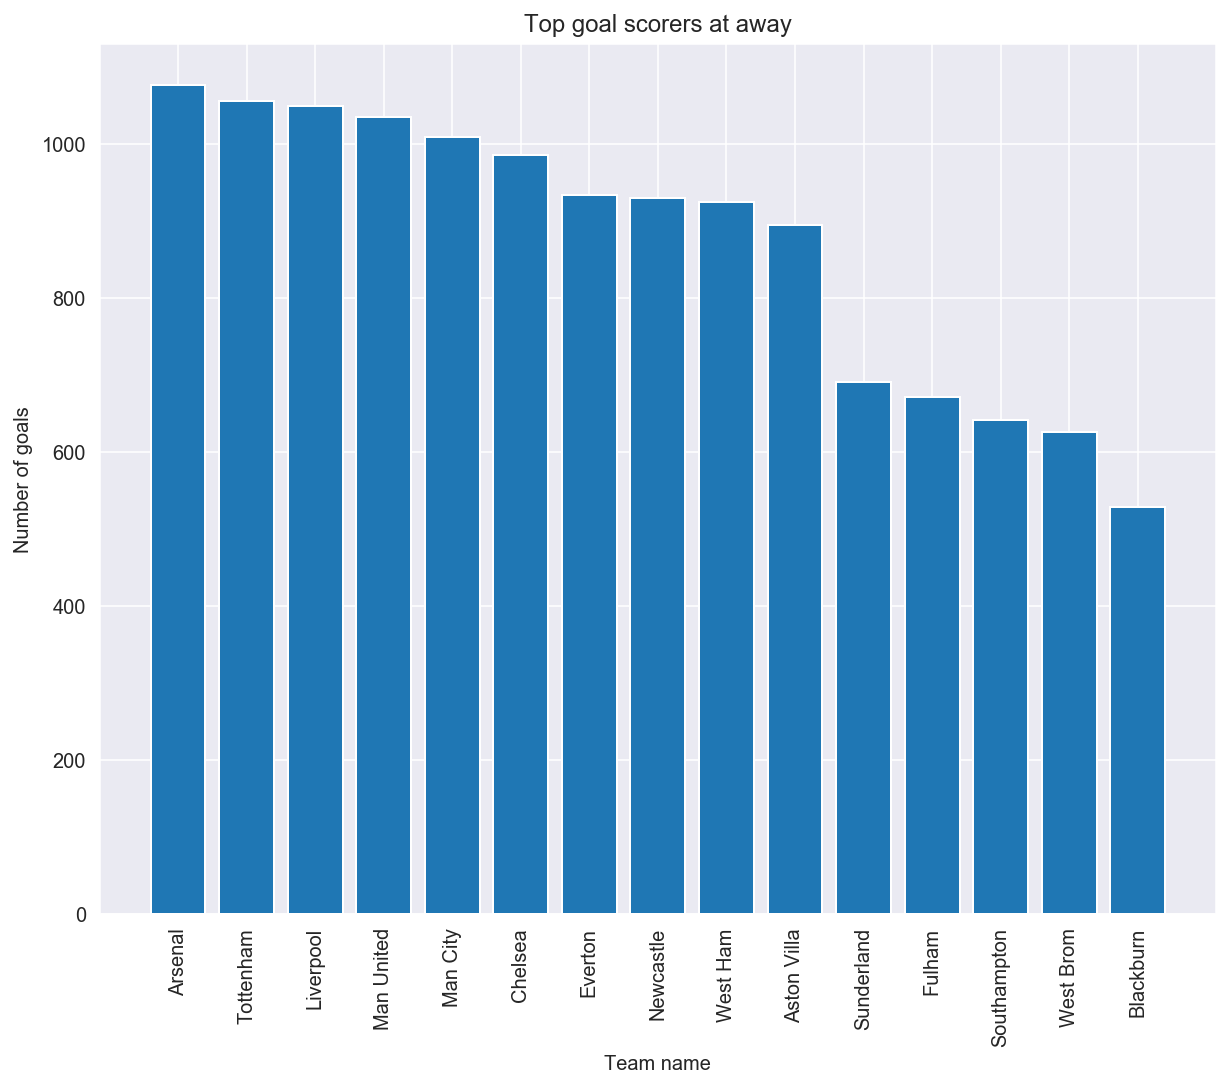

In [34]:
top_goal_scorers_away = df.groupby('AwayTeam').total_goals.sum().sort_values(ascending = False)
top_goal_scorers_away.head(15)
%matplotlib inline 
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1)
rects = ax.bar(range(15), top_goal_scorers_away.head(15).values,align = "center")
ax.set_xticks(range(15))
ax.set_xticklabels(top_goal_scorers_away.head(15).index,rotation = "vertical")
ax.set_title("Top goal scorers at away")
ax.set_ylabel("Number of goals")
ax.set_xlabel("Team name")

# 	Predicting the league outcome and points for each team

In [81]:
df=pd.read_csv("pl-2020-2021.csv") #  Inport last seasons dataset 
df

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,1.84,0.75,2.01,1.89,2.02,1.91,2.13,1.92,2.02,1.87
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,1.70,0.25,1.78,2.13,1.79,2.17,1.85,2.18,1.79,2.12
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,2.62,-1.50,1.85,2.05,1.85,2.08,1.90,2.16,1.84,2.04
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,1.92,-0.50,2.03,1.87,2.04,1.88,2.09,1.91,2.02,1.86
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,1.73,0.25,1.92,1.98,1.93,1.99,1.95,2.01,1.91,1.97
5,E0,13/09/2020,16:30,Tottenham,Everton,0,1,A,0,0,...,1.79,-0.50,2.09,1.81,2.09,1.85,2.16,1.86,2.08,1.81
6,E0,14/09/2020,20:15,Brighton,Chelsea,1,3,A,0,1,...,2.17,1.00,1.93,1.97,1.94,1.98,2.02,2.02,1.93,1.95
7,E0,14/09/2020,18:00,Sheffield United,Wolves,0,2,A,0,2,...,1.39,0.25,1.70,2.10,1.74,2.23,1.86,2.28,1.74,2.18
8,E0,19/09/2020,12:30,Everton,West Brom,5,2,H,2,1,...,1.85,-1.00,2.09,1.81,2.14,1.82,2.15,1.90,2.06,1.83
9,E0,19/09/2020,15:00,Leeds,Fulham,4,3,H,2,1,...,1.88,-0.75,1.97,1.93,1.99,1.94,2.01,2.03,1.95,1.93


In [82]:
def result(HG, AG):
    if HG > AG:
        return -1
    elif HG == AG:
        return 0
    elif HG < AG:
        return 1

df['Result'] = df.apply(lambda row: result(row.FTHG, row.FTAG), axis = 1) 
print(df.shape) # Apply a new target variable name Result

(380, 107)


# Feature extraction

In [83]:
home_data = df.groupby('HomeTeam').sum()
away_data = df.groupby('AwayTeam').sum()
home_data['Home_Mean_Score'] = home_data['FTHG'] / 19 # Home Average Scores
home_data['Home_Mean_Conceded'] = home_data['FTAG'] / 19 # Home Average Conceded
away_data['Away_Mean_Scored'] = away_data['FTAG'] / 19 # Away average Scored
away_data['Away_Mean_Conceded'] = away_data['FTHG'] / 19 # Away Average Conceded
all_data_backup = df
df
team_data = pd.DataFrame()
team_data['Team'] = home_data.index

team_data = team_data.merge(home_data['Home_Mean_Score'], left_on='Team', right_index=True)
team_data = team_data.merge(home_data['Home_Mean_Conceded'], left_on='Team', right_index=True)

team_data = team_data.merge(away_data['Away_Mean_Scored'], left_on='Team', right_index=True)
team_data = team_data.merge(away_data['Away_Mean_Conceded'], left_on='Team', right_index=True)

team_data.set_index("Team", inplace=True)
last_season_table= pd.DataFrame(index=team_data.index)
scaler = MinMaxScaler()
team_data = pd.DataFrame(scaler.fit_transform(team_data), columns=team_data.columns, index=team_data.index)
team_data # created a new dataframe from the extracted features 

,Home_Mean_Score,Home_Mean_Conceded,Away_Mean_Scored,Away_Mean_Conceded
Team,,,,
Arsenal,0.441176,0.181818,0.71875,0.107143
Aston Villa,0.588235,0.454545,0.56250,0.142857
Brighton,0.382353,0.227273,0.31250,0.321429
Burnley,0.147059,0.454545,0.34375,0.464286
Chelsea,0.647059,0.045455,0.59375,0.107143
Crystal Palace,0.323529,0.681818,0.40625,0.678571
Everton,0.441176,0.500000,0.46875,0.178571
Fulham,0.000000,0.500000,0.31250,0.357143
Leeds,0.558824,0.181818,0.81250,0.642857


# Initial pre processing

In [84]:
col_list2 = ['HomeTeam', 'AwayTeam']
data_prep = df[col_list2]

data_prep = data_prep.merge(team_data['Home_Mean_Score'], left_on='HomeTeam', right_index=True, how='left')
data_prep = data_prep.merge(team_data['Home_Mean_Conceded'], left_on='HomeTeam', right_index=True, how='left') 
data_prep = data_prep.merge(team_data['Away_Mean_Scored'], left_on='AwayTeam', right_index=True, how='left') 
data_prep = data_prep.merge(team_data['Away_Mean_Conceded'], left_on='AwayTeam', right_index=True, how='left') 

data_prep['HAtS'] = (data_prep['Home_Mean_Score'] * data_prep['Away_Mean_Conceded']); # Home Attack Strength
data_prep['AAtS'] = (data_prep['Home_Mean_Conceded'] * data_prep['Away_Mean_Scored']); # Away Attack Strength

print(data_prep.shape)

data_prep = data_prep.merge(df['Result'], left_index=True, right_index=True)

fixture_list = data_prep
data_prep # meraged it to the home and way team of each game with the results column

(380, 8)


,HomeTeam,AwayTeam,Home_Mean_Score,Home_Mean_Conceded,Away_Mean_Scored,Away_Mean_Conceded,HAtS,AAtS,Result
0,Fulham,Arsenal,0.000000,0.500000,0.71875,0.107143,0.000000,0.359375,1
1,Crystal Palace,Southampton,0.323529,0.681818,0.34375,1.000000,0.323529,0.234375,-1
2,Liverpool,Leeds,0.588235,0.136364,0.81250,0.642857,0.378151,0.110795,-1
3,West Ham,Newcastle,0.676471,0.227273,0.37500,0.500000,0.338235,0.085227,1
4,West Brom,Leicester,0.176471,1.000000,0.81250,0.178571,0.031513,0.812500,1
5,Tottenham,Everton,0.764706,0.136364,0.46875,0.178571,0.136555,0.063920,1
6,Brighton,Chelsea,0.382353,0.227273,0.59375,0.107143,0.040966,0.134943,1
7,Sheffield United,Wolves,0.088235,0.454545,0.21875,0.428571,0.037815,0.099432,1
8,Everton,West Brom,0.441176,0.500000,0.37500,0.785714,0.346639,0.187500,-1
9,Leeds,Fulham,0.558824,0.181818,0.31250,0.357143,0.199580,0.056818,-1


In [85]:
rm_col_list = ['HomeTeam','AwayTeam']
col_list = data_prep.columns.values.tolist()
col_list = [x for x in col_list if x not in rm_col_list]

to_use = data_prep[col_list]
X = [x for x in col_list if x != 'Result']
Y = [x for x in col_list if x == 'Result']

to_use

,Home_Mean_Score,Home_Mean_Conceded,Away_Mean_Scored,Away_Mean_Conceded,HAtS,AAtS,Result
0,0.000000,0.500000,0.71875,0.107143,0.000000,0.359375,1
1,0.323529,0.681818,0.34375,1.000000,0.323529,0.234375,-1
2,0.588235,0.136364,0.81250,0.642857,0.378151,0.110795,-1
3,0.676471,0.227273,0.37500,0.500000,0.338235,0.085227,1
4,0.176471,1.000000,0.81250,0.178571,0.031513,0.812500,1
5,0.764706,0.136364,0.46875,0.178571,0.136555,0.063920,1
6,0.382353,0.227273,0.59375,0.107143,0.040966,0.134943,1
7,0.088235,0.454545,0.21875,0.428571,0.037815,0.099432,1
8,0.441176,0.500000,0.37500,0.785714,0.346639,0.187500,-1
9,0.558824,0.181818,0.31250,0.357143,0.199580,0.056818,-1


# X and Y data on the model 

I first created a X and Y data to see which model preformed the best and then put foward to be training and test split.

In [86]:
X_data = to_use.drop('Result', axis=1)
Y_data = to_use['Result']

model = RandomForestClassifier(n_estimators= 10, criterion="entropy")
model.fit(X_data, Y_data)
model.score(X_data, Y_data)

0.9657894736842105

In [87]:
model2 = LogisticRegression(C=1,penalty="l2")
model2.fit(X_data, Y_data)
model2.score(X_data, Y_data) 

C:\Users\Burberry Harry\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Burberry Harry\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.5631578947368421

In [88]:
MLPClassifier() # criterion='gini', max_depth=6
model.fit(X_data, Y_data)
model.score(X_data, Y_data) 

0.968421052631579

# Training and test split on RandomForest Classifer

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2)

model1 = RandomForestClassifier(n_estimators= 10, criterion="entropy")
model1.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [90]:
predicted = model1.predict(X_test)
predicted


array([-1,  0, -1,  1,  0,  0, -1,  1,  1,  1, -1,  1, -1, -1, -1, -1,  1,
        1,  1,  1,  1, -1,  0,  1, -1,  1,  0,  0, -1, -1,  1, -1,  1, -1,
        1, -1, -1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  0,  1,  0,
       -1,  1, -1,  1,  0, -1,  0,  1,  0, -1, -1,  1,  1,  1, -1,  1,  1,
       -1, -1, -1, -1,  0, -1, -1,  1], dtype=int64)

# Cross validation

In [91]:
acc_score = accuracy_score(Y_test, predicted)
print("Accuracy score: " + str(acc_score))
scores = cross_val_score(model1, X_train, Y_train, cv=5)
print("Cross val scores")
print(scores)

Accuracy score: 0.5394736842105263
Cross val scores
[0.51612903 0.48387097 0.49180328 0.48333333 0.49152542]


In [92]:
score_train = model1.score(X_train, Y_train)
score_test = model1.score(X_test, Y_test)

print("Training set accuracy: ", '%.3f'%(score_train))
print("Test set accuracy: ", '%.3f'%(score_test))

Training set accuracy:  0.951
Test set accuracy:  0.539


In [93]:
predicted = model1.predict(X_data)
predicted
predictedDF = pd.DataFrame(predicted, columns=['Predicted'])
predictedDF.head()

,Predicted
0,1
1,-1
2,-1
3,-1
4,1


# Performance evalution

In [94]:
R_prediction = model1.predict(X_test)

In [95]:
print(accuracy_score(R_prediction, Y_test))

0.5394736842105263


In [96]:
print(classification_report(R_prediction, Y_test))
print(confusion_matrix(R_prediction, Y_test))

              precision    recall  f1-score   support

          -1       0.73      0.58      0.64        33
           0       0.25      0.33      0.29        12
           1       0.53      0.58      0.55        31

    accuracy                           0.54        76
   macro avg       0.50      0.50      0.49        76
weighted avg       0.57      0.54      0.55        76

[[19  6  8]
 [ 0  4  8]
 [ 7  6 18]]


# New dataset with predictions

In [97]:
to_use = to_use.merge(predictedDF, left_index=True, right_index=True)
fixture_list = fixture_list.merge(predictedDF, left_index=True, right_index=True)
fixture_list

,HomeTeam,AwayTeam,Home_Mean_Score,Home_Mean_Conceded,Away_Mean_Scored,Away_Mean_Conceded,HAtS,AAtS,Result,Predicted
0,Fulham,Arsenal,0.000000,0.500000,0.71875,0.107143,0.000000,0.359375,1,1
1,Crystal Palace,Southampton,0.323529,0.681818,0.34375,1.000000,0.323529,0.234375,-1,-1
2,Liverpool,Leeds,0.588235,0.136364,0.81250,0.642857,0.378151,0.110795,-1,-1
3,West Ham,Newcastle,0.676471,0.227273,0.37500,0.500000,0.338235,0.085227,1,-1
4,West Brom,Leicester,0.176471,1.000000,0.81250,0.178571,0.031513,0.812500,1,1
5,Tottenham,Everton,0.764706,0.136364,0.46875,0.178571,0.136555,0.063920,1,1
6,Brighton,Chelsea,0.382353,0.227273,0.59375,0.107143,0.040966,0.134943,1,1
7,Sheffield United,Wolves,0.088235,0.454545,0.21875,0.428571,0.037815,0.099432,1,-1
8,Everton,West Brom,0.441176,0.500000,0.37500,0.785714,0.346639,0.187500,-1,-1
9,Leeds,Fulham,0.558824,0.181818,0.31250,0.357143,0.199580,0.056818,-1,-1


In [98]:
#last_season_table['Actual Points'] = 0 
last_season_table['Predicted Points'] = 0 

def make_actual_table(x, ht, at, which):
    if x == -1:
        last_season_table.loc[ht, which] += 3
    elif x == 0:
        last_season_table.loc[ht, which] += 1
        last_season_table.loc[at, which] += 1
    elif x == 1:
        last_season_table.loc[at, which] += 3

#fixture_list.apply(lambda x: make_actual_table(x.Result, x.HomeTeam, x.AwayTeam, 'Actual Points'), axis=1)
fixture_list.apply(lambda x: make_actual_table(x.Predicted, x.HomeTeam, x.AwayTeam, 'Predicted Points'), axis=1)

0      None
1      None
2      None
3      None
4      None
5      None
6      None
7      None
8      None
9      None
10     None
11     None
12     None
13     None
14     None
15     None
16     None
17     None
18     None
19     None
20     None
21     None
22     None
23     None
24     None
25     None
26     None
27     None
28     None
29     None
       ... 
350    None
351    None
352    None
353    None
354    None
355    None
356    None
357    None
358    None
359    None
360    None
361    None
362    None
363    None
364    None
365    None
366    None
367    None
368    None
369    None
370    None
371    None
372    None
373    None
374    None
375    None
376    None
377    None
378    None
379    None
Length: 380, dtype: object

# Results

In [99]:
# 20/19 Season actual table
#actual_index = last_season_table.sort_values(by='Actual Points', ascending=0).index
predicted_index = last_season_table.sort_values(by='Predicted Points', ascending=0).index

last_season_table.sort_values(by='Predicted Points', ascending=0)

,Predicted Points
Team,
Man City,94
Chelsea,82
Liverpool,79
Man United,74
West Ham,68
Tottenham,65
Leicester,62
Arsenal,61
Everton,60


Index(['Man City', 'Man United', 'Leicester', 'Tottenham', 'Chelsea',
       'Arsenal', 'West Ham', 'Liverpool', 'Everton', 'Aston Villa', 'Leeds',
       'Crystal Palace', 'Southampton', 'Newcastle', 'Brighton', 'Wolves',
       'Fulham', 'Burnley', 'West Brom', 'Sheffield United'],
      dtype='object', name='Team')

# Predicting Match Day outcomes for Liverpool FC

# Dataset preparation

In [161]:
df=pd.read_csv("bpl.csv",encoding='latin1') #E2 # ,encoding='latin1'
df

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Fulham,Arsenal,0,3,A,0,1,A,C Kavanagh,5,...,2,6,12,12,2,3,2,2,0,0
1,Crystal Palace,Southampton,1,0,H,1,0,H,J Moss,5,...,3,5,14,11,7,3,2,1,0,0
2,Liverpool,Leeds,4,3,H,3,2,H,M Oliver,22,...,6,3,9,6,9,0,1,0,0,0
3,West Ham,Newcastle,0,2,A,0,0,D,S Attwell,15,...,3,2,13,7,8,7,2,2,0,0
4,West Brom,Leicester,0,3,A,0,0,D,A Taylor,7,...,1,7,12,9,2,5,1,1,0,0
5,Tottenham,Everton,0,1,A,0,0,D,M Atkinson,9,...,5,4,15,7,5,3,1,0,0,0
6,Brighton,Chelsea,1,3,A,0,1,A,C Pawson,13,...,3,5,8,13,4,3,1,0,0,0
7,Sheffield United,Wolves,0,2,A,0,2,A,M Dean,9,...,2,4,13,7,12,5,2,1,0,0
8,Everton,West Brom,5,2,H,2,1,H,M Dean,17,...,7,4,9,11,11,1,1,0,0,1
9,Leeds,Fulham,4,3,H,2,1,H,A Taylor,10,...,7,6,13,18,5,3,1,2,0,0


In [162]:
read_team_names = pd.read_csv('E2.csv',encoding='latin1') 
display(read_team_names.head())

FileNotFoundError: [Errno 2] File b'E2.csv' does not exist: b'E2.csv'

In [163]:
team_name_list = read_team_names['HomeTeam']
team_name=[]
for teams in team_name_list:
    if teams not in team_name:
        team_name.append(teams)
print("\n\nTeams in Season: 2021-2022")
display(team_name)



Teams in Season: 2021-2022


['Fulham',
 'Crystal Palace',
 'Liverpool',
 'West Ham',
 'West Brom',
 'Tottenham',
 'Brighton',
 'Sheffield United',
 'Everton',
 'Leeds',
 'Man United',
 'Arsenal',
 'Southampton',
 'Newcastle',
 'Chelsea',
 'Leicester',
 'Aston Villa',
 'Wolves',
 'Burnley',
 'Man City']

In [164]:
# CSV file for team name 
teams_data_frame = pd.DataFrame(team_name, columns=["Team Names"])
display(teams_data_frame)
teams_data_frame.to_csv('Teams.csv', index=None)

,Team Names
0,Fulham
1,Crystal Palace
2,Liverpool
3,West Ham
4,West Brom
5,Tottenham
6,Brighton
7,Sheffield United
8,Everton
9,Leeds


# Data Inspection

In [165]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 21 columns):
HomeTeam    380 non-null object
AwayTeam    380 non-null object
FTHG        380 non-null int64
FTAG        380 non-null int64
FTR         380 non-null object
HTHG        380 non-null int64
HTAG        380 non-null int64
HTR         380 non-null object
Referee     380 non-null object
HS          380 non-null int64
AS          380 non-null int64
HST         380 non-null int64
AST         380 non-null int64
HF          380 non-null int64
AF          380 non-null int64
HC          380 non-null int64
AC          380 non-null int64
HY          380 non-null int64
AY          380 non-null int64
HR          380 non-null int64
AR          380 non-null int64
dtypes: int64(16), object(5)
memory usage: 62.4+ KB


In [166]:

#Win rate for home team
n_matches = df.shape[0] 
n_features = df.shape[1] - 1  

n_homewins = len(df[df.FTR == 'H'])
win_rate = (float(n_homewins)/(n_matches))*100

print("Total no of matches: {}".format(n_matches))
print("Number of Features: {}".format(n_features))
print("Number of matches won by HOME: {}".format(n_homewins))
print("Win rate of HOME team: {}".format(win_rate))

Total no of matches: 380
Number of Features: 20
Number of matches won by HOME: 144
Win rate of HOME team: 37.89473684210527


In [167]:
def getTeamData(teamName):
    print("\n======================= "+ teamName + " =====================\n")
    
    #Num of goals in wins and looses
    gamesHome = df[df['HomeTeam']== teamName]
    totalGoalsScored = gamesHome['FTHG'].sum()
    
    gamesAway = df[df['AwayTeam'] == teamName]
    totalGames = gamesHome.append(gamesAway)
    numGames = len(totalGames.index)
    totalGoalsScored += gamesAway['FTAG'].sum() 
    
    
    #total goals allowed 
    totalGoalsAllowed = gamesHome['FTHG'].sum()
    totalGoalsAllowed += gamesAway['FTAG'].sum()
    
    #discipline TOTAL RED AND YELLOW CARDS
    #totalYellowCards = gamesHome['HY'].sum()
    #totalYellowCards += gamesAway['AY'].sum()
    
    #totalRedCards = gamesHome['HR'].sum()
    #totalRedCards += gamesAway['AR'].sum()
    
    
    #total Fouls
    totalFouls = gamesHome['HF'].sum()
    totalFouls += gamesAway['AF'].sum()
    
    #total Corners
    totalCorners = gamesHome['HC'].sum()
    totalCorners += gamesAway['AC'].sum()
    
    
    #shots per game (SPG) = totalshots / totalgames
    totalShots = gamesHome['HS'].sum()
    totalShots += gamesAway['AS'].sum()
    
    #avg shots allowed per game
    totalShotsAgainst = gamesHome['AS'].sum()
    totalShotsAgainst += gamesAway['HS'].sum()
    if numGames != 0:
        HSPG = totalShots / numGames #HomeShotsPerGame
        ASPG = totalShotsAgainst / numGames #AwayShotsPerGame
        display("HSPG: {}".format(HSPG))
        display("ASPG: {}".format(ASPG))
    
    #games won percentage= GamesWon / numGames
    gamesWon = totalGames[totalGames['FTR']== "H"]
    gamesLost = totalGames[totalGames['FTR'] == "A"]
    gamesDraw = totalGames[totalGames['FTR'] == "D"]
    numGamesWon = len(gamesWon.index)
    numGamesLost = len(gamesLost.index)
    numGamesDraw = len(gamesDraw.index)
    
    if numGames != 0:
        gamesWonPercent = numGamesWon / numGames
        gamesLostPercent = numGamesLost / numGames
        gamesDrawPercent = numGamesDraw / numGames 
    
    print("Games Win Percent: {}".format(gamesWonPercent))
    print("Games Loose Percent: {}".format(gamesLostPercent))
    print("Games Draw Percent: {}".format(gamesDrawPercent))
    
    #Total shots on target:
    totalShotsOnTarget = gamesHome['HST'].sum()
    totalShotsOnTarget += gamesAway['AST'].sum()
    
    #GoalSaves
    goalSaves = totalShotsOnTarget - totalGoalsAllowed
    
    #Goal Save Percentage
    if totalShotsOnTarget != 0:
        goalSavesPercent = goalSaves / totalShotsOnTarget
        
    #Goal Save Ratio
    if goalSaves != 0:
        saveRatio = totalShotsOnTarget / goalSaves
    
    #Goal scoring Percent
    if totalShots != 0 :
        scoringPercent = (totalShots - totalGoalsScored)/totalShots
    
    #Goal scoring Ration
    if totalGoalsScored != 0:
        scoringRatio = totalShotsOnTarget / totalGoalsScored
    
        if numGames == 0: 
           gamesWon = 0
           gamesLost = 0
           gamesDraw = 0 
           totalGoalsScored = 0 
           totalShotsOnTarget = 0 
           totalGoalsAllowed = 0 
           totalYellowCards = 0 
           totalRedCards = 0 
           totalFouls = 0 
           totalCorners = 0 
           totalShots = 0 
           totalShotsAgainst = 0 
           HSPG = 0  
           ASPG = 0 
           goalSaves = 0 
           goalSavesPercent = 0 
           scoringPercent = 0 
           saveRatio = 0 
           scoringRatio = 0
    
    return [teamName, totalGoalsScored, totalShotsOnTarget, totalGoalsAllowed, 
            totalFouls, totalCorners, 
            totalShots, totalShotsAgainst, HSPG, ASPG, goalSaves, goalSavesPercent, scoringPercent,
            saveRatio, scoringRatio]

In [168]:
getTeamData('Man United')


======================= Man United =====================



'HSPG: 13.710526315789474'

'ASPG: 11.0'

Games Win Percent: 0.23684210526315788
Games Loose Percent: 0.47368421052631576
Games Draw Percent: 0.2894736842105263


['Man United',
 73,
 212,
 73,
 452,
 197,
 521,
 418,
 13.710526315789474,
 11.0,
 139,
 0.6556603773584906,
 0.8598848368522073,
 1.525179856115108,
 2.904109589041096]

In [169]:
getTeamData('Liverpool')


======================= Liverpool =====================



'HSPG: 16.0'

'ASPG: 8.763157894736842'

Games Win Percent: 0.34210526315789475
Games Loose Percent: 0.42105263157894735
Games Draw Percent: 0.23684210526315788


['Liverpool',
 68,
 214,
 68,
 396,
 260,
 608,
 333,
 16.0,
 8.763157894736842,
 146,
 0.6822429906542056,
 0.8881578947368421,
 1.4657534246575343,
 3.1470588235294117]

# Dataset visualisation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B3184FB780>,
      dtype=object)

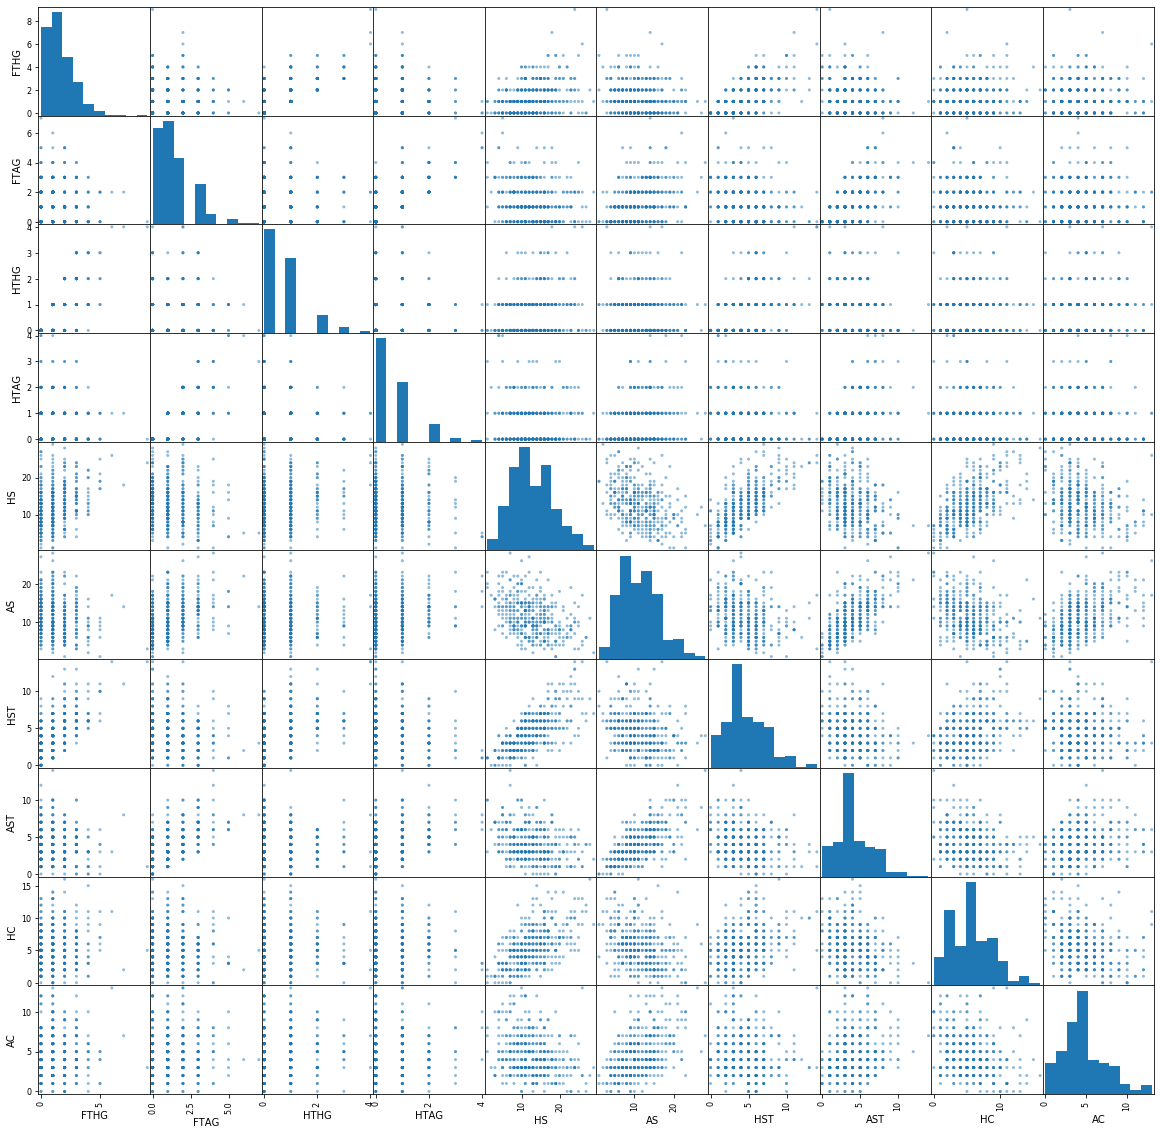

In [170]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[['FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST','HC','AC']],figsize=(20,20))

# Dataset visualisation

In [171]:

#filteredData = df[(df.HomeTeam.isin(team_name))]
#df = filteredData[(filteredData.AwayTeam.isin(team_name))]

In [172]:
df

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Fulham,Arsenal,0,3,A,0,1,A,C Kavanagh,5,...,2,6,12,12,2,3,2,2,0,0
1,Crystal Palace,Southampton,1,0,H,1,0,H,J Moss,5,...,3,5,14,11,7,3,2,1,0,0
2,Liverpool,Leeds,4,3,H,3,2,H,M Oliver,22,...,6,3,9,6,9,0,1,0,0,0
3,West Ham,Newcastle,0,2,A,0,0,D,S Attwell,15,...,3,2,13,7,8,7,2,2,0,0
4,West Brom,Leicester,0,3,A,0,0,D,A Taylor,7,...,1,7,12,9,2,5,1,1,0,0
5,Tottenham,Everton,0,1,A,0,0,D,M Atkinson,9,...,5,4,15,7,5,3,1,0,0,0
6,Brighton,Chelsea,1,3,A,0,1,A,C Pawson,13,...,3,5,8,13,4,3,1,0,0,0
7,Sheffield United,Wolves,0,2,A,0,2,A,M Dean,9,...,2,4,13,7,12,5,2,1,0,0
8,Everton,West Brom,5,2,H,2,1,H,M Dean,17,...,7,4,9,11,11,1,1,0,0,1
9,Leeds,Fulham,4,3,H,2,1,H,A Taylor,10,...,7,6,13,18,5,3,1,2,0,0


In [173]:
# Separate into feature set and target variable
#FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
X_all = df.drop(['FTR'],1) #FTR
y_all = df['FTR'] #FTR
# Z_all = X_all.drop(['Date','FTHG','FTAG','HTHG','HTAG','HTR','Referee'],1)
Z_all = X_all.drop(['HTR','Referee'],1)

# print(X_all)
# print(y_all)
# print(Z_all)

# Standardising the data.
from sklearn.preprocessing import scale
#Center to the mean and component wise scale to unit variance.
# cols = [['HS','AS','HST','HF','AF','HY','AY','HR','AR','HC','AC','AST','HC','AC']]
cols = [['FTHG','FTAG','HTHG','HTAG','HS','AS','HST','HF','AF','HC','AC','AST','HC','AC']]
for col in cols:
    X_all[col] = scale(X_all[col])

In [174]:
Z_all

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Fulham,Arsenal,0,3,0,1,5,13,2,6,12,12,2,3,2,2,0,0
1,Crystal Palace,Southampton,1,0,1,0,5,9,3,5,14,11,7,3,2,1,0,0
2,Liverpool,Leeds,4,3,3,2,22,6,6,3,9,6,9,0,1,0,0,0
3,West Ham,Newcastle,0,2,0,0,15,15,3,2,13,7,8,7,2,2,0,0
4,West Brom,Leicester,0,3,0,0,7,13,1,7,12,9,2,5,1,1,0,0
5,Tottenham,Everton,0,1,0,0,9,15,5,4,15,7,5,3,1,0,0,0
6,Brighton,Chelsea,1,3,0,1,13,10,3,5,8,13,4,3,1,0,0,0
7,Sheffield United,Wolves,0,2,0,2,9,11,2,4,13,7,12,5,2,1,0,0
8,Everton,West Brom,5,2,2,1,17,6,7,4,9,11,11,1,1,0,0,1
9,Leeds,Fulham,4,3,2,1,10,14,7,6,13,18,5,3,1,2,0,0


In [175]:
Z_all.tail()

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
375,Liverpool,Crystal Palace,2,0,1,0,19,5,5,4,10,8,14,1,2,2,0,0
376,Man City,Everton,5,0,2,0,21,8,11,3,8,10,7,5,2,2,0,0
377,Sheffield United,Burnley,1,0,1,0,12,10,3,3,11,1,8,9,3,1,0,0
378,West Ham,Southampton,3,0,2,0,14,17,7,5,5,9,2,3,0,3,0,0
379,Wolves,Man United,1,2,1,2,14,9,4,4,14,3,6,2,4,1,0,0


In [176]:
#we want continous vars that are integers for our input data, so lets remove any categorical vars
def preprocess_features(Z):

    # Initialize new output DataFrame
    output = pd.DataFrame(index = Z.index)

    # Investigate each feature column for the data
    for col, col_data in Z.iteritems():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
                    
        # Collect the revisedd columns
        output = output.join(col_data)
    
    return output

In [177]:

Z_all = preprocess_features(Z_all)
print ("Processed feature columns ({} total features):\n{}".format(len(Z_all.columns), list(Z_all.columns)))

Processed feature columns (56 total features):
['HomeTeam_Arsenal', 'HomeTeam_Aston Villa', 'HomeTeam_Brighton', 'HomeTeam_Burnley', 'HomeTeam_Chelsea', 'HomeTeam_Crystal Palace', 'HomeTeam_Everton', 'HomeTeam_Fulham', 'HomeTeam_Leeds', 'HomeTeam_Leicester', 'HomeTeam_Liverpool', 'HomeTeam_Man City', 'HomeTeam_Man United', 'HomeTeam_Newcastle', 'HomeTeam_Sheffield United', 'HomeTeam_Southampton', 'HomeTeam_Tottenham', 'HomeTeam_West Brom', 'HomeTeam_West Ham', 'HomeTeam_Wolves', 'AwayTeam_Arsenal', 'AwayTeam_Aston Villa', 'AwayTeam_Brighton', 'AwayTeam_Burnley', 'AwayTeam_Chelsea', 'AwayTeam_Crystal Palace', 'AwayTeam_Everton', 'AwayTeam_Fulham', 'AwayTeam_Leeds', 'AwayTeam_Leicester', 'AwayTeam_Liverpool', 'AwayTeam_Man City', 'AwayTeam_Man United', 'AwayTeam_Newcastle', 'AwayTeam_Sheffield United', 'AwayTeam_Southampton', 'AwayTeam_Tottenham', 'AwayTeam_West Brom', 'AwayTeam_West Ham', 'AwayTeam_Wolves', 'FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC'

In [178]:

#  the feature information by printing the first five rows
print ("\nFeature values:")
display(Z_all.head())


Feature values:


,HomeTeam_Arsenal,HomeTeam_Aston Villa,HomeTeam_Brighton,HomeTeam_Burnley,HomeTeam_Chelsea,HomeTeam_Crystal Palace,HomeTeam_Everton,HomeTeam_Fulham,HomeTeam_Leeds,HomeTeam_Leicester,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,0,0,0,0,0,0,0,1,0,0,...,2,6,12,12,2,3,2,2,0,0
1,0,0,0,0,0,1,0,0,0,0,...,3,5,14,11,7,3,2,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,6,3,9,6,9,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,3,2,13,7,8,7,2,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,7,12,9,2,5,1,1,0,0


# Initial pre processing

In [179]:
from sklearn.model_selection import train_test_split

# split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(Z_all, y_all, 
                                                    test_size = 20, #50
                                                    random_state = 2,
                                                    stratify = y_all)

In [180]:
from time import time 
from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print ("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    
    end = time()
    # Print and return results
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    
    return f1_score(target, y_pred, average='macro'), sum(target == y_pred) / float(len(y_pred))
def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # print the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    f1, acc = predict_labels(clf, X_train, y_train)
    print (f1, acc)
    print ("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
    f1, acc = predict_labels(clf, X_test, y_test)
    print ("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

    


# Models

In [181]:

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
clf_A = LogisticRegression(random_state = 42)
clf_D = RandomForestClassifier(random_state = 42)
clf_E = MLPClassifier(activation = 'tanh', alpha = 0.05, hidden_layer_sizes = (10, 30, 10))

A = train_predict(clf_A, X_train, y_train, X_test, y_test)
print ('')
train_predict(clf_D, X_train, y_train, X_test, y_test)
print ('')
train_predict(clf_E, X_train, y_train, X_test, y_test)
print ('')

Training a LogisticRegression using a training set size of 360. . .
Trained model in 0.1113 seconds


C:\Users\Burberry Harry\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Burberry Harry\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Made predictions in 0.2131 seconds.
0.9586517383649541 0.9666666666666667
F1 score and accuracy score for training set: 0.9587 , 0.9667.
Made predictions in 0.0000 seconds.
F1 score and accuracy score for test set: 0.9328 , 0.9500.

Training a RandomForestClassifier using a training set size of 360. . .


C:\Users\Burberry Harry\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Trained model in 0.1145 seconds
Made predictions in 0.0160 seconds.
0.9966558565284681 0.9972222222222222
F1 score and accuracy score for training set: 0.9967 , 0.9972.
Made predictions in 0.0080 seconds.
F1 score and accuracy score for test set: 0.7434 , 0.8500.

Training a MLPClassifier using a training set size of 360. . .


C:\Users\Burberry Harry\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Trained model in 5.1781 seconds
Made predictions in 0.1463 seconds.
0.9967313823771898 0.9972222222222222
F1 score and accuracy score for training set: 0.9967 , 0.9972.
Made predictions in 0.0080 seconds.
F1 score and accuracy score for test set: 0.8750 , 0.9000.



In [182]:
model = MLPClassifier(activation = 'tanh', alpha = 0.05, hidden_layer_sizes = (10, 30, 10))                        
model.fit(X_train, y_train)


C:\Users\Burberry Harry\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='tanh', alpha=0.05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 30, 10), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [183]:
model.predict(X_test)

array(['A', 'H', 'H', 'A', 'A', 'A', 'A', 'A', 'D', 'H', 'H', 'D', 'A',
       'H', 'H', 'H', 'D', 'D', 'A', 'H'], dtype='<U1')

In [184]:
predictedProbability = model.predict_proba(X_test)
predictedProbability = pd.DataFrame(predictedProbability, columns=['Away Team','Draw','Home Team'])

display((predictedProbability *100).head(10))

,Away Team,Draw,Home Team
0,98.351254,1.638531,0.010215
1,0.067985,6.025897,93.906118
2,0.010199,1.570804,98.418996
3,98.546572,1.445100,0.008328
4,96.268022,3.713458,0.018520
5,95.731497,4.248703,0.019800
6,98.489231,1.502626,0.008143
7,98.318703,1.672157,0.009141
8,1.626982,74.979539,23.393479
9,0.010208,1.327903,98.661889


# Perfroamance Evaluation 

In [185]:
K_prediction = model.predict(X_test)

In [186]:
print(accuracy_score(K_prediction, y_test))

1.0


In [187]:
print(classification_report(K_prediction, y_test))
print(confusion_matrix(K_prediction, y_test))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00         8
           D       1.00      1.00      1.00         4
           H       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

[[8 0 0]
 [0 4 0]
 [0 0 8]]


# Prediction on new dataset

In [188]:
fixtures = pd.read_csv('test2.csv')
# fixtures = fixtures[pd.isnull(fixtures['Result'])] #drop all the rows having result certain values
#fixtures = fixtures.drop(['Round Number','Date','Location','Result'],1)
fixtures.columns = ['Home Team','Away Team']
fixtures['FTHG']= 0
fixtures['FTAG'] =0 
fixtures['HTHG'] = 0
fixtures['HTAG'] = 0
fixtures['HS'] = 0
fixtures['AS'] = 0
fixtures['HST'] = 0
fixtures['AST'] = 0
fixtures['HF'] = 0
fixtures['AF'] = 0
fixtures['HC'] = 0
fixtures['AC'] = 0
fixtures['HY'] = 0
fixtures['AY'] = 0
fixtures['HR'] = 0
fixtures['AR'] = 0

In [189]:
display(fixtures.head(10))

,Home Team,Away Team,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Norwich,Liverpool,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Liverpool,Burnley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Liverpool,Chelsea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Leeds United,Liverpool,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Liverpool,Crystal Palace,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Brentford,Liverpool,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Liverpool,Manchester City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Watford,Liverpool,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Manchester United,Liverpool,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Liverpool,Brigton & Hove Albion,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [190]:

preprocessedFixtures = preprocess_features(fixtures)

In [191]:

print ("Processed feature columns ({} total features):\n{}".format(len(preprocessedFixtures.columns),
                                                                   list(preprocessedFixtures.columns)))

Processed feature columns (56 total features):
['Home Team_Arsenal', 'Home Team_Aston Villa', 'Home Team_Brentford', 'Home Team_Brigton & Hove Albion', 'Home Team_Burnley', 'Home Team_Chelsea', 'Home Team_Crystal Palace', 'Home Team_Everton', 'Home Team_Leeds United', 'Home Team_Leicester City', 'Home Team_Liverpool', 'Home Team_Manchester City ', 'Home Team_Manchester United ', 'Home Team_Newcastle United', 'Home Team_Norwich', 'Home Team_Sheffield United', 'Home Team_Southampton', 'Home Team_Tottenham Hotspur', 'Home Team_Watford', 'Home Team_West Ham', 'Home Team_Wolverhampton Wanderers', 'Home Team_leeds United', 'Away Team_Arsenal ', 'Away Team_Aston Villa', 'Away Team_Brenford', 'Away Team_Brigton & Hove Albion', 'Away Team_Burnley', 'Away Team_Chelsea', 'Away Team_Crystal Palace', 'Away Team_Everton', 'Away Team_Leeds United', 'Away Team_Leicester City', 'Away Team_Liverpool', 'Away Team_Manchester City', 'Away Team_Newcastle United', 'Away Team_Norwich', 'Away Team_Southampton'

In [192]:
model.predict(preprocessedFixtures)

array(['A', 'D', 'D', 'A', 'A', 'D', 'D', 'D', 'D', 'D', 'A', 'D', 'H',
       'A', 'A', 'H', 'H', 'A', 'D', 'D', 'D', 'A', 'A', 'A', 'D', 'H',
       'A', 'D', 'D', 'A', 'D', 'D', 'D', 'A', 'H', 'D', 'A', 'D'],
      dtype='<U1')

In [193]:
fixtures['Result Predicted'] = model.predict(preprocessedFixtures)

In [194]:
Result = fixtures.drop(['FTHG','FTAG','HTHG','HTAG','HS','AS','HST','HF','AF','HY',
                        'AY','HR','AR','HC','AC','AST','HC','AC'],1)
Result.head(10)

,Home Team,Away Team,Result Predicted
0,Norwich,Liverpool,A
1,Liverpool,Burnley,D
2,Liverpool,Chelsea,D
3,Leeds United,Liverpool,A
4,Liverpool,Crystal Palace,A
5,Brentford,Liverpool,D
6,Liverpool,Manchester City,D
7,Watford,Liverpool,D
8,Manchester United,Liverpool,D
9,Liverpool,Brigton & Hove Albion,D


In [195]:
fixturePredictedProbability = model.predict_proba(preprocessedFixtures) *100
fixturePredictedProbability = pd.DataFrame(fixturePredictedProbability, columns=['Away win %','Draw %','Home win %'])

display(fixturePredictedProbability)

,Away win %,Draw %,Home win %
0,62.277769,35.764959,1.957272
1,39.521982,53.160928,7.317090
2,34.642839,61.791388,3.565773
3,61.005748,36.556950,2.437303
4,52.689791,40.013500,7.296710
5,25.973351,67.673788,6.352861
6,44.317676,48.314075,7.368249
7,19.121700,63.753459,17.124841
8,44.454838,52.370365,3.174796
9,14.976949,51.245260,33.777791


In [196]:
final = pd.concat([Result, fixturePredictedProbability], axis = 1)

In [197]:
final.head(20)

,Home Team,Away Team,Result Predicted,Away win %,Draw %,Home win %
0,Norwich,Liverpool,A,62.277769,35.764959,1.957272
1,Liverpool,Burnley,D,39.521982,53.160928,7.317090
2,Liverpool,Chelsea,D,34.642839,61.791388,3.565773
3,Leeds United,Liverpool,A,61.005748,36.556950,2.437303
4,Liverpool,Crystal Palace,A,52.689791,40.013500,7.296710
5,Brentford,Liverpool,D,25.973351,67.673788,6.352861
6,Liverpool,Manchester City,D,44.317676,48.314075,7.368249
7,Watford,Liverpool,D,19.121700,63.753459,17.124841
8,Manchester United,Liverpool,D,44.454838,52.370365,3.174796
9,Liverpool,Brigton & Hove Albion,D,14.976949,51.245260,33.777791


# Resluts 

In [115]:
final.to_csv('final-Predicted-Result2.csv', index = None) #index=None for no indexing

In [119]:
readFixtures = pd.read_csv('test2.csv')
exportToFixtures = final.drop(['Home Team','Away Team'],1)

PredictedResultWithFixtureData = pd.concat([readFixtures,exportToFixtures], axis = 1)
PredictedResultWithFixtureData.to_csv('Predicted_Result_With_Fixture_Data.csv')


display(PredictedResultWithFixtureData)

,HomeTeam,AwayTeam,Result Predicted,Away win %,Draw %,Home win %
0,Norwich,Liverpool,A,58.469853,21.279140,20.251007
1,Liverpool,Burnley,D,31.899494,43.227658,24.872848
2,Liverpool,Chelsea,H,14.545275,34.517109,50.937617
3,Leeds United,Liverpool,D,14.221937,77.505336,8.272727
4,Liverpool,Crystal Palace,H,40.502302,13.542104,45.955593
5,Brentford,Liverpool,D,12.475786,80.389695,7.134518
6,Liverpool,Manchester City,D,19.562992,56.412872,24.024136
7,Watford,Liverpool,D,27.772879,55.826361,16.400760
8,Manchester United,Liverpool,D,17.241006,72.506559,10.252434
9,Liverpool,Brigton & Hove Albion,H,21.195721,37.965522,40.838757


In [120]:
PredictedResultWithFixtureData

,HomeTeam,AwayTeam,Result Predicted,Away win %,Draw %,Home win %
0,Norwich,Liverpool,A,58.469853,21.279140,20.251007
1,Liverpool,Burnley,D,31.899494,43.227658,24.872848
2,Liverpool,Chelsea,H,14.545275,34.517109,50.937617
3,Leeds United,Liverpool,D,14.221937,77.505336,8.272727
4,Liverpool,Crystal Palace,H,40.502302,13.542104,45.955593
5,Brentford,Liverpool,D,12.475786,80.389695,7.134518
6,Liverpool,Manchester City,D,19.562992,56.412872,24.024136
7,Watford,Liverpool,D,27.772879,55.826361,16.400760
8,Manchester United,Liverpool,D,17.241006,72.506559,10.252434
9,Liverpool,Brigton & Hove Albion,H,21.195721,37.965522,40.838757


#  Predicting the Scoreline of a Football Match using Poisson Distribution

In [153]:
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HHW,AHW,HC,AC,HF,AF,HO,AO
count,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000
mean,1.521316,1.149342,0.681316,0.503158,13.514474,10.628684,6.123816,4.762895,10.115132,10.508289,6.093289,4.775395,2.573816,2.958026,0.392237,0.435789
std,1.296464,1.140914,0.831679,0.719872,5.281227,4.570199,3.338366,2.787153,4.780265,4.981628,3.105905,2.727661,3.875048,4.073635,1.275238,1.348512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,4.000000,3.000000,8.000000,8.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,6.000000,4.000000,10.000000,11.000000,6.000000,4.000000,1.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,13.000000,8.000000,6.000000,13.000000,14.000000,8.000000,6.000000,3.000000,3.000000,0.000000,0.000000
max,9.000000,9.000000,5.000000,5.000000,43.000000,30.000000,24.000000,20.000000,33.000000,28.000000,20.000000,19.000000,28.000000,29.000000,14.000000,17.000000


([<matplotlib.axis.XTick at 0x17dcaab7710>,
 <a list of 18 Text xticklabel objects>)

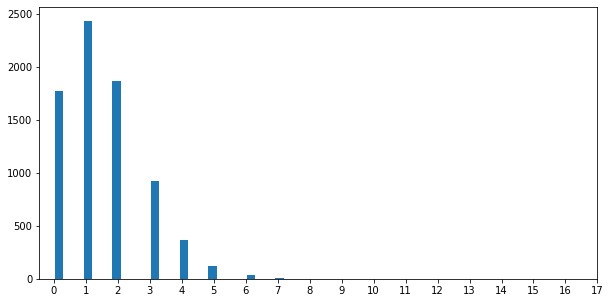

In [156]:
# most_probable home score
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
plt.hist(df.FTHG,bins=30,edgecolor='white')
plt.xticks(range(18))

([<matplotlib.axis.XTick at 0x17dcab8e470>,
 <a list of 20 Text xticklabel objects>)

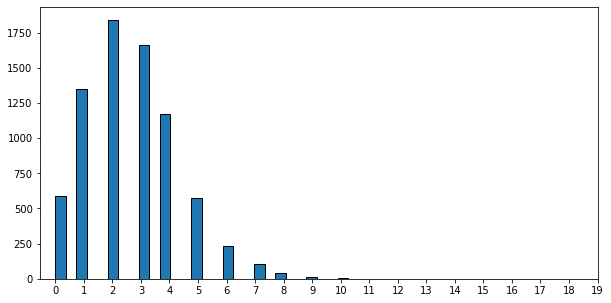

In [157]:
#most probable total goals in a match
import matplotlib.pyplot as plt
df['total_goals']=df['FTHG']+df['FTAG']
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
plt.hist(df.total_goals,bins=30,edgecolor='black')
plt.xticks(range(20))

In [165]:
df['total_goals']=df['FTHG']+df['FTAG']
df['Date']=df['Date'].apply(lambda x : int(str.split(x,'/')[0]))
rec_data=df.loc[(df['Date']>=19/8/2000)]
rec_data.iloc[[rec_data.total_goals.argmax()]]
print(rec_data.total_goals.mean()) # average goals we can expect within 90 minutes.

2.6706578947368422


C:\Users\Burberry Harry\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  after removing the cwd from sys.path.


In [166]:
# Poisson probability is: P(x; μ) = (e-μ) (μx) / x!
#lam =2.67
from scipy.special import factorial
import numpy as np

def poisson(k,exp_events):
    minutes=90
    lam =(exp_events)
    p_k= np.exp(-lam)*np.power(lam,k)/factorial(k)
    #print The probability of k goals in 90 minutes is in the p_k line
    return p_k

In [167]:
#proability of goals acc to poisson distribution
k=[]
p_k=[]
for i in range(10):
    p_k.append(poisson(i,2.67)*100)
    k.append(i)

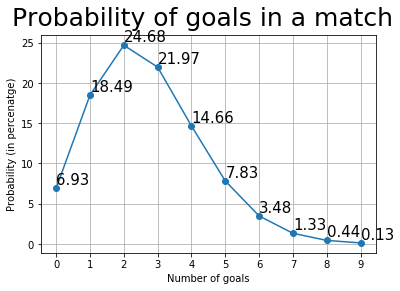

In [168]:
fig = plt.figure()
plt.plot(k,p_k,'o-')
plt.xticks(range(10))
fig.suptitle('Probability of goals in a match',fontsize=25)
plt.xlabel('Number of goals')
plt.ylabel('Probability (in percenatge)')
for x,y in zip(k,p_k):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,4), # distance from text to points (x,y)
                 ha='left',fontsize=15)
plt.grid(True)

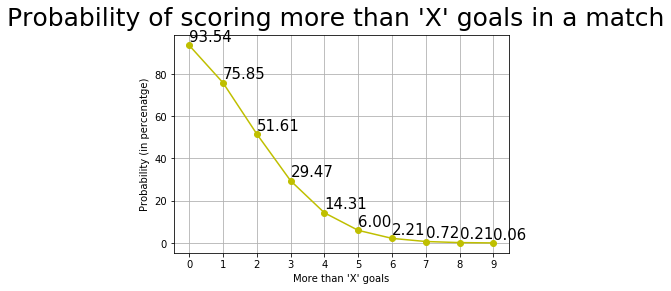

In [170]:
def p_lessorequal(n_query,exp_events,quiet=True):
    p_n=poisson(np.arange(100),exp_events)
    p=p_n[:n_query+1].sum()
    if quiet:
        return p
    else:
        print(f'{exp_events} goals per game.Probability of {n_query} or fewer goals in 1 game: {100*p:.2f}%.')
    
def p_greaterorequal(n_query,exp_events,quiet=True):
    p = 1 - p_lessorequal(n_query,exp_events)
    if quiet:
        return p
    else:
        print(f'Probability of more than {n_query} goals in 1 game: {100*p:.2f}%.')
        
prob=[]
for i in range(10):
    p = p_greaterorequal(i,2.74,True)
    prob.append(p*100)
fig = plt.figure()
plt.plot(k,prob,'o-y')
plt.xticks(range(10))
fig.suptitle("Probability of scoring more than 'X' goals in a match",fontsize=25)
plt.xlabel("More than 'X' goals")
plt.ylabel('Probability (in percenatge)')
for x,y in zip(k,prob):

    label = "{:.2f}".format(y)

    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset pixels", 
                 xytext=(0,4), 
                 ha='left',fontsize=15)
plt.grid(True)

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

In [ ]:
len(df[(df.HomeTeam =='Liverpool') & (df.AwayTeam =='Man United')])

In [ ]:
df['HomeTeam'] = df['HomeTeam'].apply(lambda x: (''.join(x.split())).lower())
df['AwayTeam'] = df['AwayTeam'].apply(lambda x: (''.join(x.split())).lower())

In [ ]:
import numpy as np
from scipy import stats
counts = np.random.poisson(2.71,10)
print(int(stats.mode(counts)[0]))

In [ ]:
def PredictScore():
    
    HomeTeam = input("Enter Home Team: ")
    ht = (''.join(HomeTeam.split())).lower()
    AwayTeam = input("Enter Away Team: ")
    at = (''.join(AwayTeam.split())).lower()
    
    if len(df[(df.HomeTeam ==ht) & (df.AwayTeam ==at)]) > 20:
        
        mean_home_score = df[(df.HomeTeam ==ht) & (df.AwayTeam ==at)].FTHG.mean()
        mean_away_score = df[(df.HomeTeam ==ht) & (df.AwayTeam ==at)].FTAG.mean()
        
        home_goal = int(stats.mode(np.random.poisson(mean_home_score,100000))[0])                    
        away_goal = int(stats.mode(np.random.poisson(mean_away_score,100000))[0])
        
    else:
        mean_home_goal_conceded = df[(df.HomeTeam ==ht)].FTAG.mean()
        mean_away_goal_scored   = df[(df.AwayTeam ==at)].FTAG.mean()
        away_goal = int(stats.mode(np.random.poisson(1/2*(mean_home_goal_conceded+mean_away_goal_scored),100000))[0])
        
        mean_away_goal_conceded = df[(df.HomeTeam ==at)].FTHG.mean()
        mean_home_goal_scored   = df[(df.AwayTeam ==ht)].FTHG.mean()
        home_goal = int(stats.mode(np.random.poisson(1/2*(mean_away_goal_conceded+mean_home_goal_scored),100000))[0])
    
    mean_total_score = int(stats.mode(
        np.random.poisson((df[(df.HomeTeam==ht) &    (df.AwayTeam==at)].total_goals.mean()),100000))[0])
    
    print(f'Expected total goals are {mean_total_score}')
    print(f'Games played {len(df[(df.HomeTeam ==ht) & (df.AwayTeam ==at)])} matches')
    print(f'The scoreline is {HomeTeam} {home_goal}:{away_goal} {AwayTeam}')

In [ ]:
PredictScore()

REFERENCE: https://www.analyticsvidhya.com/blog/2020/10/predicting-the-scoreline-of-a-football-match-using-poisson-distribution/. 

# Hyperparameter Tuning 


# RandomForestClassifier

In [71]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, Y_train)

C:\Users\Burberry Harry\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [75]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 200}

# Logistic Regression

In [106]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,Y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

C:\Users\Burberry Harry\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Burberry Harry\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Burberry Harry\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Burberry Harry\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Burberry Harry\Anaconda3\lib\site-packages\sklearn\linear_mod

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l1'}
accuracy : 0.5592105263157895


C:\Users\Burberry Harry\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Burberry Harry\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Burberry Harry\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Burberry Harry\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Burberry Harry\Anaconda3\lib\site-packages\sklearn\linear_mod

#  MLPClassifier

In [129]:
mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train) # X is train samples and y is the corresponding labels

C:\Users\Burberry Harry\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Burberry Harry\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=100,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_sta...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alph

In [130]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [131]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.597 (+/-0.180) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'sgd'}
0.742 (+/-0.089) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'adam'}
0.558 (+/-0.121) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.731 (+/-0.142) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.647 (+/-0.119) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'sgd'}
0.711 (+/-0.144) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'adam'}
0.639 (+/-0.045) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.769 (+/-0.082) 